# Intro to Neural Networks
## Assignment 2
### Mohsin Mohammed

### Importing the dependencies

In [1]:
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import tensorflow as tf
import os
import cv2
from pathlib import Path
import random
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

2023-11-21 18:25:13.100794: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-21 18:25:13.118503: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 18:25:13.118520: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 18:25:13.118531: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 18:25:13.122140: I tensorflow/core/platform/cpu_feature_g

### 1. Perform an extensive exploratory data analysis (EDA) and provide a preliminary investigation of the dataset

In [2]:
# lets load the training images:
apple_dir = 'dataset/train/apple'        # the directory of our apple images
apple_files = [os.path.join(apple_dir, f) for f in os.listdir(apple_dir) if f.endswith('.jpg')]    # using list comprehension to join the path and finding images in the listed dir
apple_images = [cv2.imread(f) for f in apple_files]      # storing the images using list comprehension


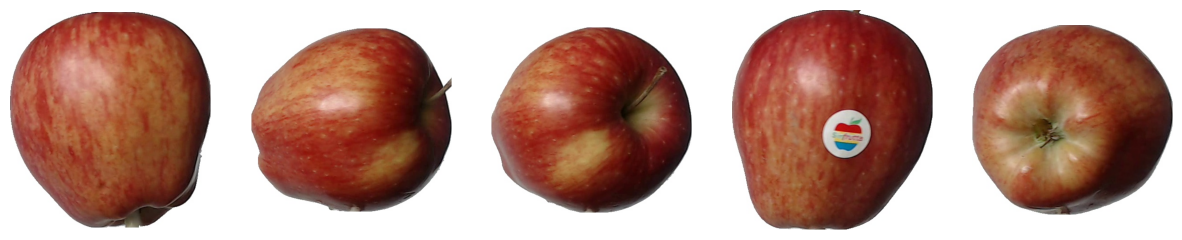

In [3]:
# lets visualize some sample images: 
def plot_images(images):
    sample_images = random.sample(images, 5)  # choose 5 random images using python's random module
    plt.figure(figsize=(15, 5))                     # setting the plot size
    for idx, img in enumerate(sample_images):       # using the index to iterate over the first five images
        plt.subplot(1, 5, idx+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()

plot_images(apple_images)


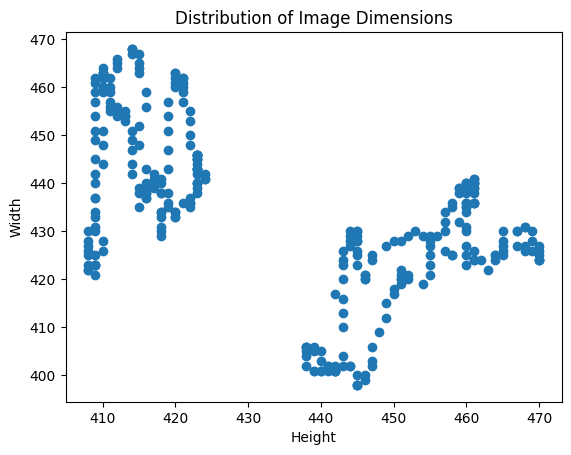

In [4]:
# lets check image size:
def plot_image_size(images):
    dimensions = [(img.shape[0], img.shape[1]) for img in images] # using list comprehension to check height using shape[0] and width using shape[1], a list that contains the width and height of each image as a tuple
    heights, widths = zip(*dimensions)    # separating the heights and widths into two two separate lists
    plt.scatter(heights, widths)
    plt.xlabel("Height")
    plt.ylabel("Width")
    plt.title("Distribution of Image Dimensions")
    plt.show()

plot_image_size(apple_images)

We can see that the images share a common resolution which means that they do not vary much in dimensions. We can see that there are no outliers meaning that all images are consistent in shape.

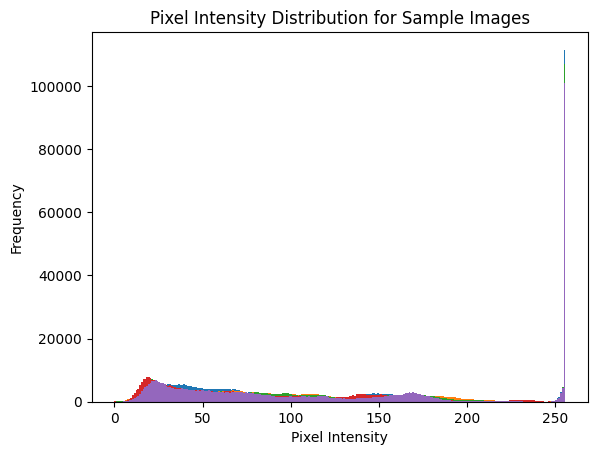

<Figure size 640x480 with 0 Axes>

In [5]:
# lets analyze the pixel distribution:
def plot_pixel_distribution(images):
    sample_images = random.sample(images, 5) 
    for img in sample_images:
        plt.hist(img.ravel(), 256, [0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Pixel Intensity Distribution for Sample Images')
    plt.show()
    plt.savefig('apple_pixel.jpg')


plot_pixel_distribution(apple_images)

In [6]:
# We can do the same for the rest of the images from the other folders. 
cabbage_dir = 'dataset/train/cabbage'        # the directory of our apple images
cabbage_files = [os.path.join(cabbage_dir, f) for f in os.listdir(cabbage_dir) if f.endswith('.jpg')]    # using list comprehension to join the path and finding images in the listed dir
cabbage_images = [cv2.imread(f) for f in cabbage_files]      # storing the images using list comprehension


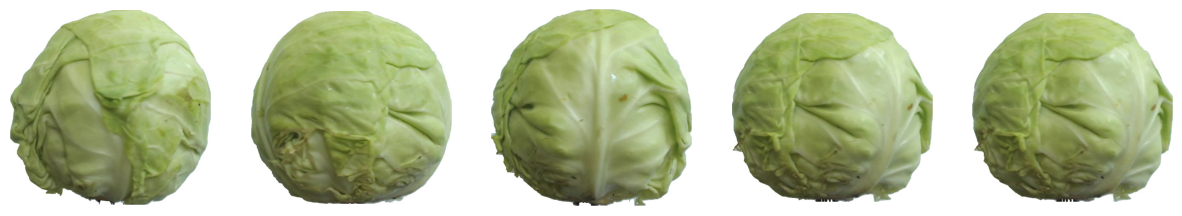

In [7]:
# lets plot cabbage images:
plot_images(cabbage_images)

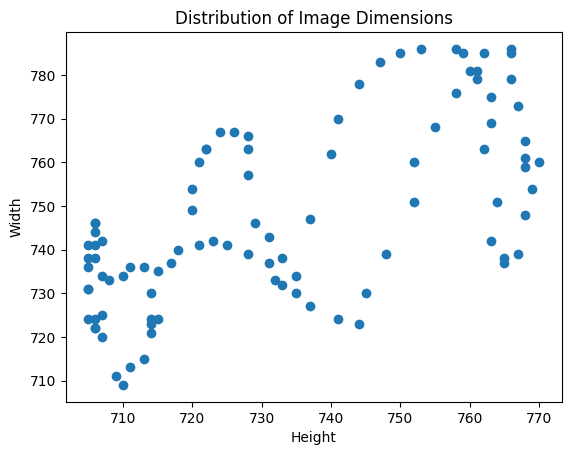

In [8]:
plot_image_size(cabbage_images)

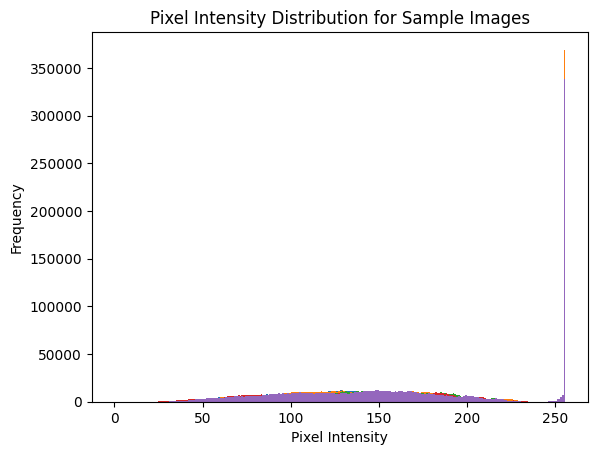

<Figure size 640x480 with 0 Axes>

In [9]:
plot_pixel_distribution(cabbage_images)

In [10]:
train_cabbage_count = len(cabbage_images)
train_cabbage_count

96

In [11]:
carrot_dir = 'dataset/train/carrot'        # the directory of our apple images
carrot_files = [os.path.join(carrot_dir, f) for f in os.listdir(carrot_dir) if f.endswith('.jpg')]    # using list comprehension to join the path and finding images in the listed dir
carrot_images = [cv2.imread(f) for f in carrot_files]      # storing the images using list comprehension

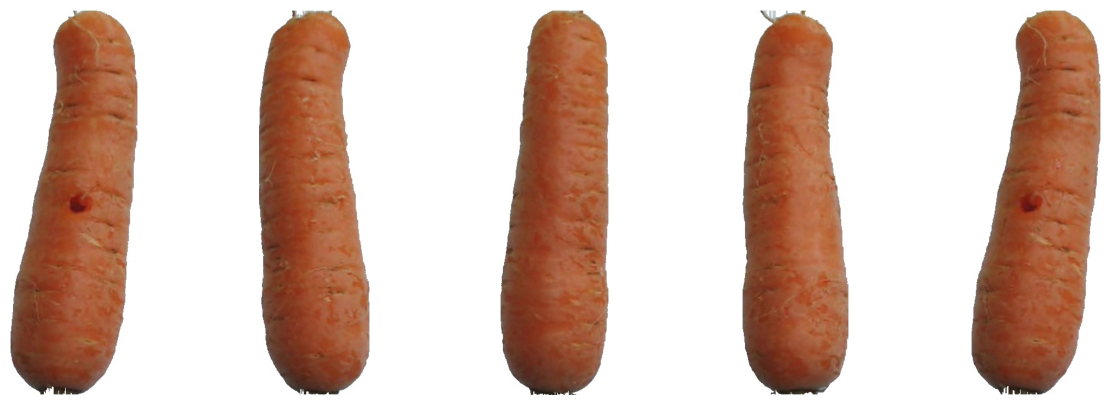

In [12]:
plot_images(carrot_images)

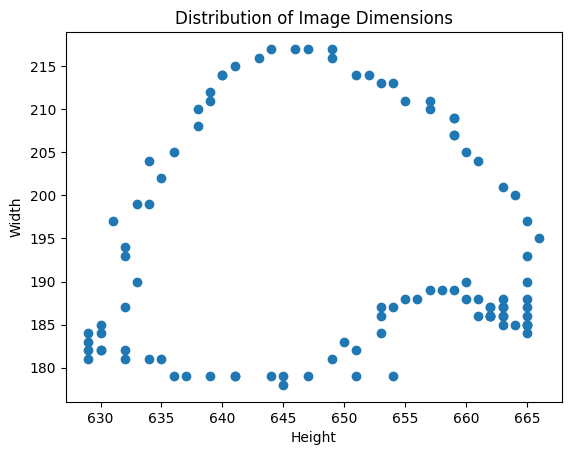

In [13]:
plot_image_size(carrot_images)

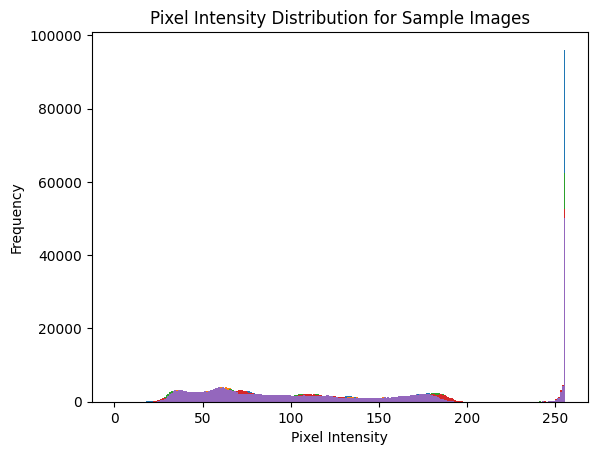

<Figure size 640x480 with 0 Axes>

In [14]:
plot_pixel_distribution(carrot_images)

pixel intensity is evenly spread out which means we have a good combination of lighter and darker images

In [15]:
cucumber_dir = 'dataset/train/cucumber'        # the directory of our apple images
cucumber_files = [os.path.join(cucumber_dir, f) for f in os.listdir(cucumber_dir) if f.endswith('.jpg')]    # using list comprehension to join the path and finding images in the listed dir
cucumber_images = [cv2.imread(f) for f in cucumber_files] 

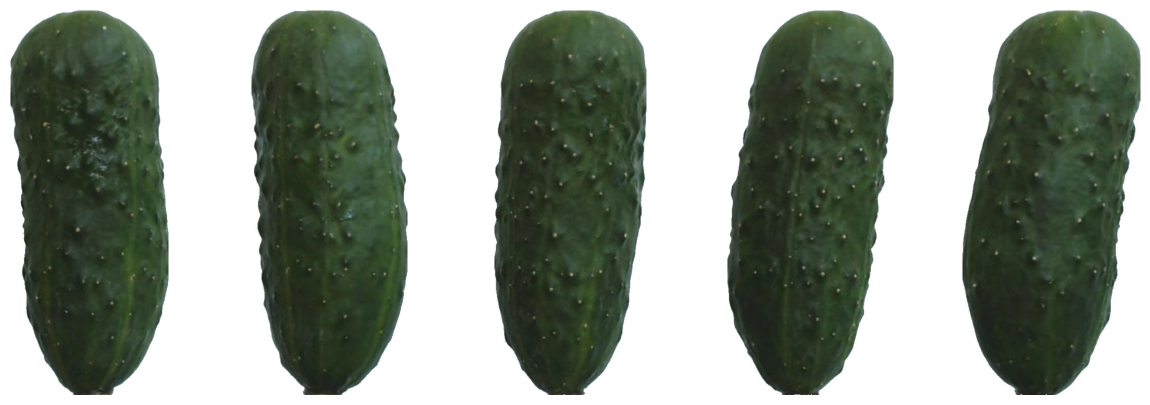

In [16]:
plot_images(cucumber_images)

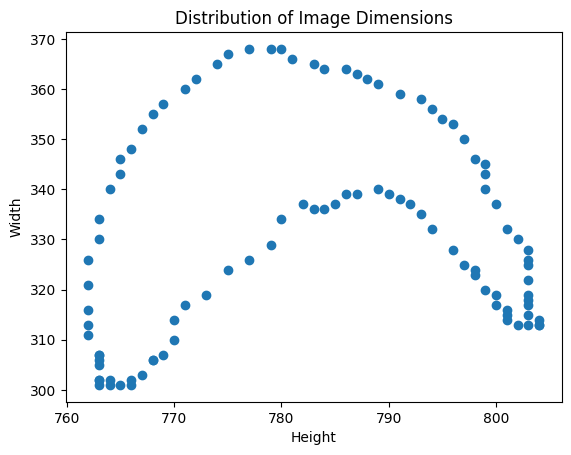

In [17]:
plot_image_size(cucumber_images)

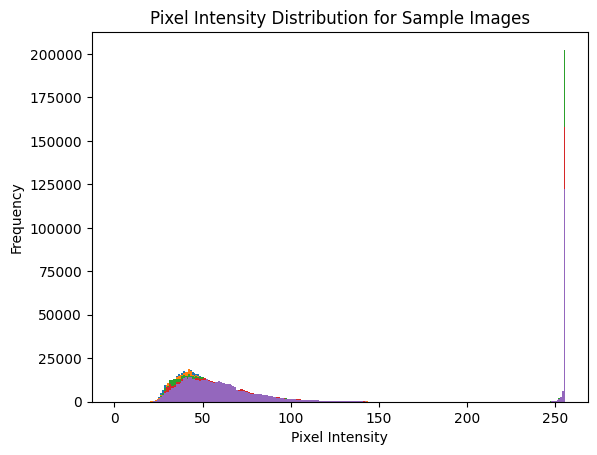

<Figure size 640x480 with 0 Axes>

In [18]:
plot_pixel_distribution(cucumber_images)

Cucumbers look like they all have somewhat lower pixel intensity compared to the other vegetable. This means that they are slightly darker images

In [19]:
eggplant_dir = 'dataset/train/eggplant'        # the directory of our apple images
eggplant_files = [os.path.join(eggplant_dir, f) for f in os.listdir(eggplant_dir) if f.endswith('.jpg')]    # using list comprehension to join the path and finding images in the listed dir
eggplant_images = [cv2.imread(f) for f in eggplant_files] 

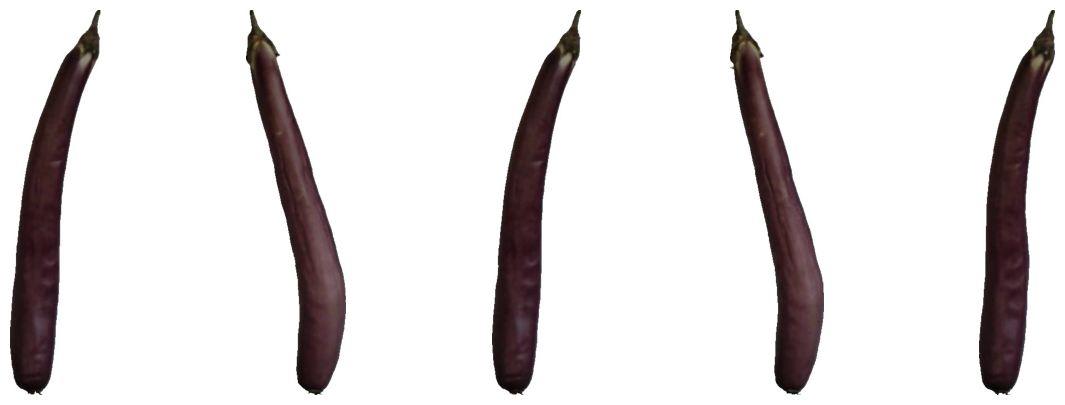

In [20]:
plot_images(eggplant_images)

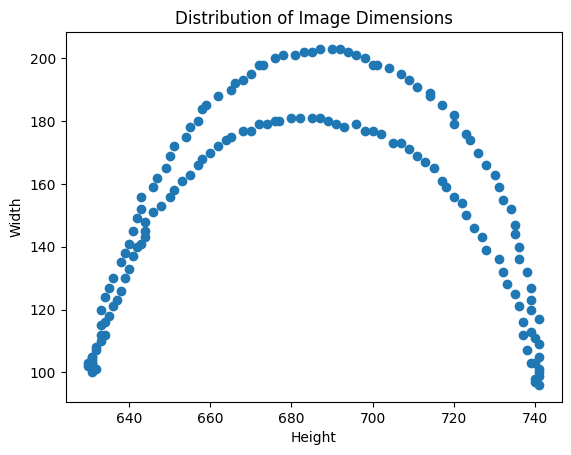

In [21]:
plot_image_size(eggplant_images)

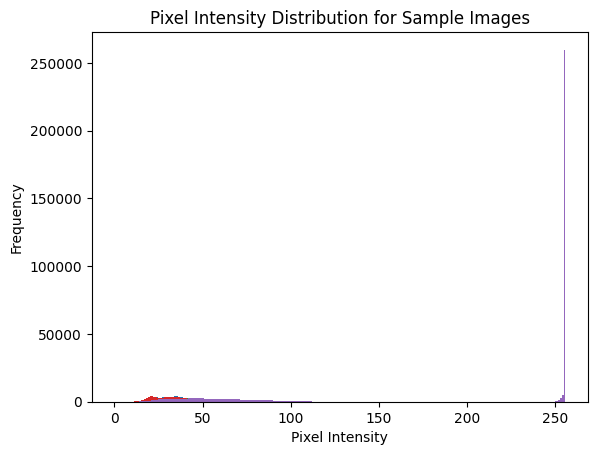

<Figure size 640x480 with 0 Axes>

In [22]:
plot_pixel_distribution(eggplant_images)

Lower pixel intesity means we have darker images like we see in the pictures of eggplants

In [23]:
pear_dir = 'dataset/train/pear'        # the directory of our apple images
pear_files = [os.path.join(pear_dir, f) for f in os.listdir(pear_dir) if f.endswith('.jpg')]    # using list comprehension to join the path and finding images in the listed dir
pear_images = [cv2.imread(f) for f in pear_files] 

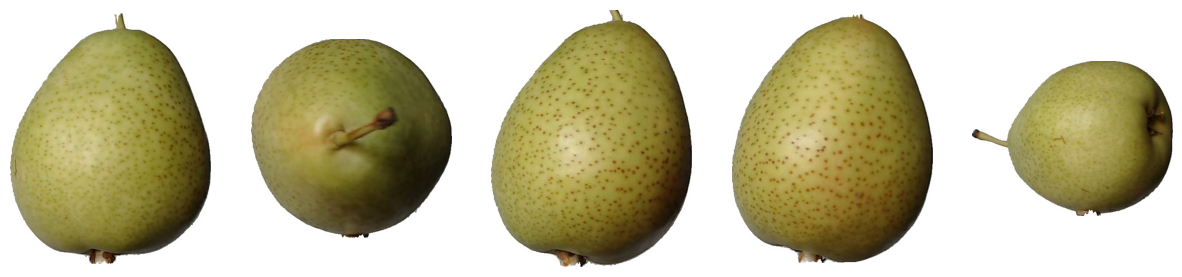

In [24]:
plot_images(pear_images)

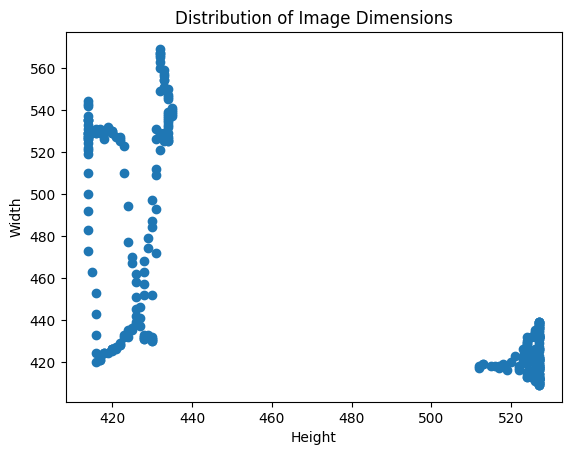

In [25]:
plot_image_size(pear_images)

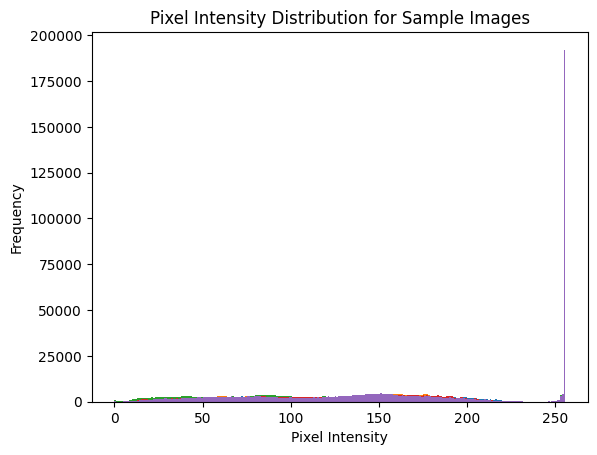

<Figure size 640x480 with 0 Axes>

In [26]:
plot_pixel_distribution(pear_images)

In [27]:
zucchini_dir = 'dataset/train/zucchini'        # the directory of our apple images
zucchini_files = [os.path.join(zucchini_dir, f) for f in os.listdir(zucchini_dir) if f.endswith('.jpg')]    # using list comprehension to join the path and finding images in the listed dir
zucchini_images = [cv2.imread(f) for f in zucchini_files] 

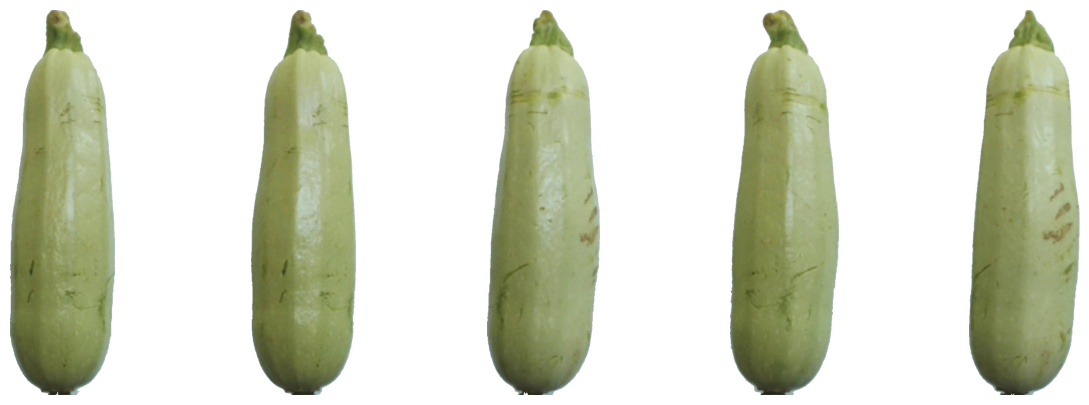

In [28]:
plot_images(zucchini_images)

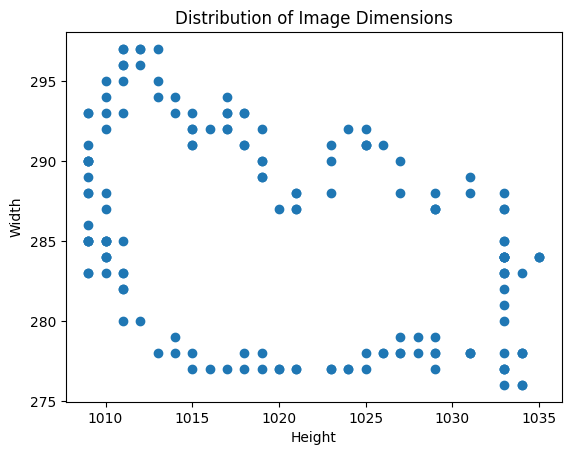

In [29]:
plot_image_size(zucchini_images)

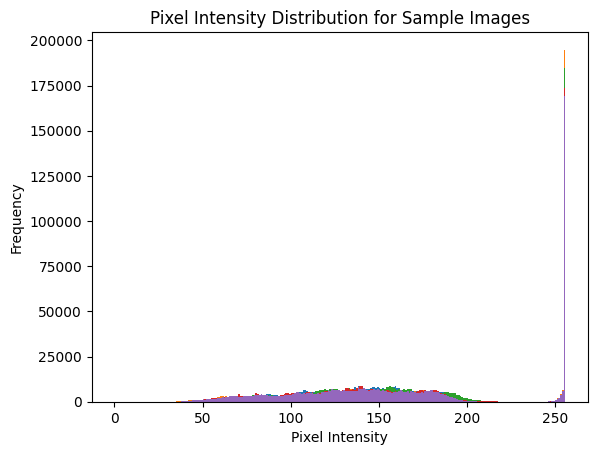

<Figure size 640x480 with 0 Axes>

In [30]:
plot_pixel_distribution(zucchini_images)

Image Analysis:

We can see that most of the train images look alike while some anomalies do exists with respect to the image sizes which was evidently clear from looking at the sample images of pears. 
We can see that a few pears are clustered to the extreme right which while some are clustered evenly. This means that some pears are extremely large while some are smallerin somparison.

We also found a good balance of pixel intensity across all our training images. The only vegetable that has low pixel intensity is eggplant. We can keep an eye on this and understand that we may have to improve our image quality if the model predicts the eggplant as wrong.

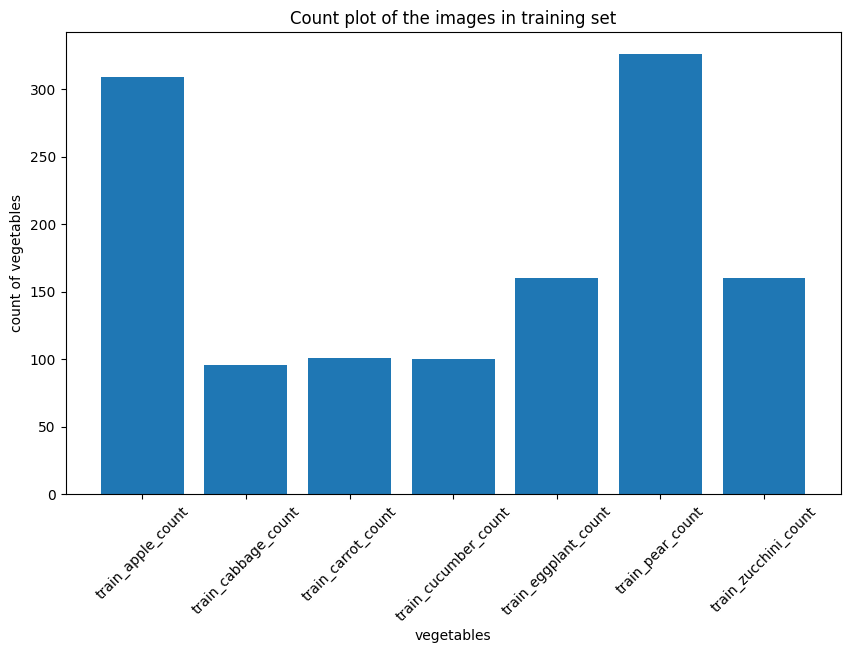

In [31]:
# Lets plot the number of images in our train set:
# lets count the number of train images
data = {
    'train_apple_count':int(len(apple_images)),
    'train_cabbage_count': int(len(cabbage_images)),
    'train_carrot_count':int(len(carrot_images)),
    'train_cucumber_count':int(len(cucumber_images)),
    'train_eggplant_count':int(len(eggplant_images)),
    'train_pear_count':int(len(pear_images)),
    'train_zucchini_count':int(len(zucchini_images))
}

keys = data.keys()
values = data.values()

plt.figure(figsize=(10, 6))
plt.bar(keys, values)
plt.title("Count plot of the images in training set")
plt.xlabel('vegetables')
plt.xticks(rotation=45)
plt.ylabel('count of vegetables')
plt.show()

A quick bar plot reveals that we have more apples and pears than we do other vegetables/fruits. We can infer that the testing data also has similar pixel intensities, 
size since the data is slit between train and test so the same characteristics are common to both sets.

### 2.Perform necessary pre-processing and data augmentation.

In [58]:
#create an object of ImageDataGenerator, for augmenting train set
train_datagen = ImageDataGenerator(rescale = 1./255,         # rescales the pixel values from range[0, 255] to [0,1] (normalization which helps in training)
                                   rotation_range=15,        # randomly rotates the image by 15 degrees
                                   width_shift_range=0.1,    # randomly shifts the image horizontally by upto 10% of its width 
                                   height_shift_range=0.1,   # randomly shifts the image vertically by upto 10% of its height
                                   zoom_range = 0.1,         # randomly zooms in and out of the image by upto 10%
                                   vertical_flip=False,      # no vertical flips
                                   horizontal_flip = True,   # randomly flips the image horizontally
                                   fill_mode="reflect")      # gaps or empty spaces found are filled by reflecting bordering pixels

#create another object of ImageDataGenerator, for augmenting test set.
# we dont augment the test data other than rescaling because we have to evaluate the model on the original images.
test_datagen = ImageDataGenerator(rescale = 1./255)


#apply image augmentation on train set by resizing all images to 224x224 and creating batches of 8 images.
training_set = train_datagen.flow_from_directory('dataset/train',    # directory where the training images are stored.
                                                 target_size = (224,224),   # resizing the images to 224 x 224
                                                 batch_size = 16)            # batches of 8 images ata time


#apply image augmentation on test set by resizing all images to 224x224 and creating batches of 8 images.
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (224,224),
                                            batch_size = 16)


Found 1252 images belonging to 7 classes.
Found 623 images belonging to 7 classes.


### 3. Build a suitable CNN architecture following the 5 steps in the NN model life-cycle as shown in figure1 below.

### Creating the model

In [59]:
# vgg16"

In [60]:
# Creating a vgg16 model using the sequential API designed to take in 224 x 224 imagesand output probabilities for a 7 label classification task
model = Sequential()

# Adding two convolutional layers, shape of the input image is 224x224 pixels with 3 RGB color channels, 64 filters for each layer and size of the filters is 3 x 3
# Padding ensures the same dimensions and uses rectified linear unit as its activation function
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

# Adding a max pooling layer: reduxes the dimensions by taking the max value in a 2 x 2 region and stride of 2.
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# two more convolutional layers are added again with 128 filters with filter size being 3 X 3
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

# Another max pooling layer is added with same parameters as before
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Pattern is repeated with three convolutional layers with 256 filters and one max pooling layer
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Pattern is repeated with 3 convolutional layers, 512 filters and one max pooling layer 
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Pattern is repeated with 3 convolutional layers, 512 filters and one max pooling layer 
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#Flattening the 3D feature maps into a 1D vector. Necessaary step that connects the convolutional layers to the fully connected dense layers
model.add(Flatten())

# Two dense layers (also known as fully connected layers) with 4096 units each
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))

# Final dense layer with 7 units and a softmax activation function. This is a multi label classification task where 7 represents the 7 types of classes
model.add(Dense(units=7, activation="softmax"))

### Compiling the Model

In [61]:
# importing the optimizer from keras
from keras.optimizers import Adam

# Creating an instance of the Adam optimizer and using a learning rate of 0.001
opt = Adam(learning_rate=0.01)

# Compiling the model using the categorical cross entropy which is usually used for multi class classification; measures how well the predictions match the actual labels and accuracy is the chosen metric
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [63]:
# Creating a checkpoint to save our model in case of unforseen events like a power failure so we can resume training using our last saved checkpoints
filepath="best_model_vgg16.hdf5"                          #File name includes epoch and validation loss.
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
csv_logger = CSVLogger('vgg16.log.csv')
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
callbacks_list = [checkpoint, csv_logger, early_stop]

### Fitting the model

In [64]:
#steps_per_epoch: num of data divided by batch size
#validation_steps: num of data divided by batch size

history = model.fit_generator(generator=training_set,
                         steps_per_epoch = (1252/16),
                         epochs = 100,
                         validation_data = test_set,
                         validation_steps = (623/16),
                              callbacks=callbacks_list)

Epoch 1/100


/tmp/ipykernel_129976/2380627133.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=training_set,


79/78 [==============================] - ETA: 0s - loss: 356269312.0000 - accuracy: 0.1605
Epoch 1: val_loss improved from inf to 19293.36523, saving model to best_model_vgg16.hdf5
78/78 [==============================] - 14s 136ms/step - loss: 356269312.0000 - accuracy: 0.1605 - val_loss: 19293.3652 - val_accuracy: 0.0803
Epoch 2/100
79/78 [==============================] - ETA: 0s - loss: 115469.8516 - accuracy: 0.1757
Epoch 2: val_loss improved from 19293.36523 to 6725.83203, saving model to best_model_vgg16.hdf5
78/78 [==============================] - 11s 139ms/step - loss: 115469.8516 - accuracy: 0.1757 - val_loss: 6725.8320 - val_accuracy: 0.2600
Epoch 3/100
79/78 [==============================] - ETA: 0s - loss: 332.8760 - accuracy: 0.2276
Epoch 3: val_loss improved from 6725.83203 to 1.82981, saving model to best_model_vgg16.hdf5
78/78 [==============================] - 11s 144ms/step - loss: 332.8760 - accuracy: 0.2276 - val_loss: 1.8298 - val_accuracy: 0.2600
Epoch 4/100
79

### 4.Evaluate the performance of the model:

In [65]:
# evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print('> %.3f' % (acc * 100.0))

/tmp/ipykernel_129976/3528342730.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)


> 26.003


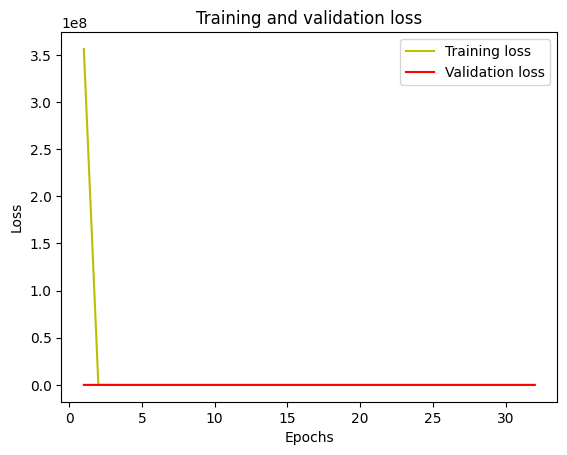

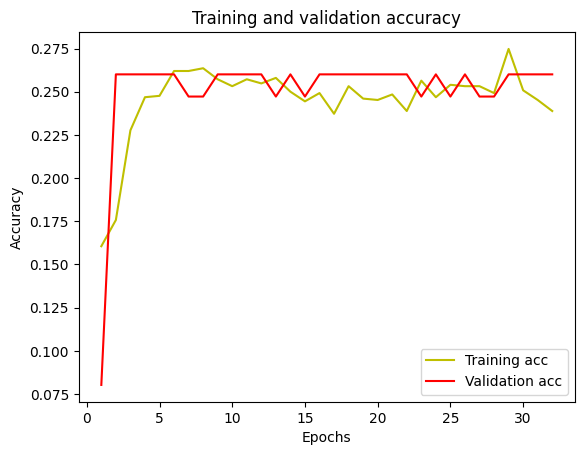

In [66]:
history = history

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 5. Perform model saving and prediction on new datapoints.

In [67]:
test_image = image.load_img('dataset/new_samples/r0_2.jpg', 
                            target_size = (224, 224))

In [68]:
#add channel dimension for image
test_image = image.img_to_array(test_image)

In [69]:
##add batch dimension for image
test_image = np.expand_dims(test_image, axis = 0)

In [70]:
result = model.predict(test_image)

1/1 [==============================] - 0s 58ms/step


In [71]:
training_set.class_indices

{'apple': 0,
 'cabbage': 1,
 'carrot': 2,
 'cucumber': 3,
 'eggplant': 4,
 'pear': 5,
 'zucchini': 6}

In [72]:
if result[0][0] == 0:
    print('apple')
elif result[0][0] == 1:
    print('cabbage')
elif result[0][0] == 2:
    print('carrot')
elif result[0][0] == 3:
    print('cucumber')
elif result[0][0] == 4:
    print('eggplant')
elif result[0][0] == 5:
    print('pear')
elif result[0][0] == 6:
    print('zucchini')

In [73]:
result

array([[0.26542062, 0.07830966, 0.07113472, 0.07806967, 0.12050863,
        0.26625136, 0.12030537]], dtype=float32)

In [74]:
model.save("vgg16_0.h5")

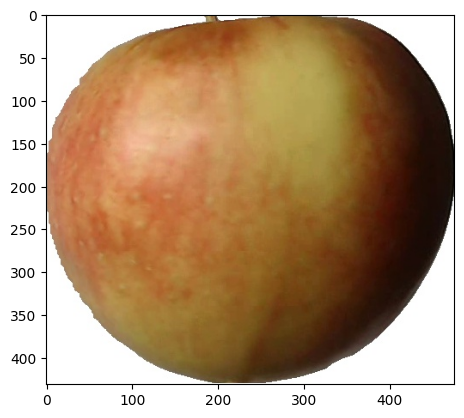

1/1 [==============================] - 0s 54ms/step
pear


In [76]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, target_size=(224, 224))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 224, 224, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

img1 = mpimg.imread('dataset/new_samples/r0_6.jpg')
imgplot = plt.imshow(img1)
plt.show()
img = load_image("dataset/new_samples/r0_6.jpg")
model = load_model('vgg16_0.h5')
# predict the class
result = np.argmax(model.predict(img))
if result == 0:
    print('apple')
elif result == 1:
    print('cabbage')
elif result == 2:
    print('carrot')
elif result == 3:
    print('cucumber')
elif result == 4:
    print('eggplant')
elif result == 5:
    print('pear')
elif result == 6:
    print('zucchini')
else:
    print("Not in the list")

# Alexnet


## Creating an alex net architechture to see the difference between vgg and alexnet

In [77]:
tf.keras.backend.clear_session()

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding="valid", activation="relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(BatchNormalization())

# Passing to Fully Connected Layers
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(units=4096, activation="relu"))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(BatchNormalization())

# 2nd Fully Connected Layer
model.add(Dense(units=4096, activation="relu"))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(BatchNormalization())

# 3rd Fully Connected Layer (Output Layer)
model.add(Dense(units=7, activation="softmax"))

### compiling the model

In [78]:
from keras.optimizers import Adam

# Creating an instance of the Adam optimizer and using a learning rate of 0.01
opt = Adam(learning_rate=0.01)

# Compiling the model using the categorical cross entropy which is usually used for multi class classification; measures how well the predictions match the actual labels and accuracy is the chosen metric
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                        

### Image Augmentation: We need to resize the images to match the architechture of alexnet 

In [89]:
#create an object of ImageDataGenerator, for augmenting train set
train_datagen = ImageDataGenerator(rescale = 1./255,         # rescales the pixel values from range[0, 255] to [0,1] (normalization which helps in training)
                                   rotation_range=15,        # randomly rotates the image by 15 degrees
                                   width_shift_range=0.1,    # randomly shifts the image horizontally by upto 10% of its width 
                                   height_shift_range=0.1,   # randomly shifts the image vertically by upto 10% of its height
                                   zoom_range = 0.1,         # randomly zooms in and out of the image by upto 10%
                                   vertical_flip=False,      # no vertical flips
                                   horizontal_flip = True,   # randomly flips the image horizontally
                                   fill_mode="reflect")      # gaps or empty spaces found are filled by reflecting bordering pixels

#create another object of ImageDataGenerator, for augmenting test set.
# we dont augment the test data other than rescaling because we have to evaluate the model on the original images.
test_datagen = ImageDataGenerator(rescale = 1./255)


#apply image augmentation on train set by resizing all images to 227x227 and creating batches of 8 images.
training_set = train_datagen.flow_from_directory('dataset/train',    # directory where the training images are stored.
                                                 target_size = (227,227),   # resizing the images to 224 x 224
                                                 batch_size = 16)            # batches of 16 images ata time


#apply image augmentation on test set by resizing all images to 227x227 and creating batches of 16 images.
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (227,227),
                                            batch_size = 16)


Found 1252 images belonging to 7 classes.
Found 623 images belonging to 7 classes.


### Fitting the Model

In [90]:
# Creating a checkpoint to save our model in case of unforseen events like a power failure so we can resume training using our last saved checkpoints
filepath="best_model_alexnet.hdf5"                          #File name includes epoch and validation loss.
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
csv_logger = CSVLogger('alexnet.log.csv')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
callbacks_list = [checkpoint, csv_logger, early_stop]

In [91]:
#steps_per_epoch: num of data divided by batch size
#validation_steps: num of data divided by batch size

history = model.fit_generator(generator=training_set,
                         steps_per_epoch = (1252/16),
                         epochs = 100,
                         validation_data = test_set,
                         validation_steps = (623/16),
                         callbacks=callbacks_list)

Epoch 1/100


/tmp/ipykernel_129976/3744862357.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=training_set,


79/78 [==============================] - ETA: 0s - loss: 1.0118 - accuracy: 0.8466
Epoch 1: val_loss improved from inf to 2.40112, saving model to best_model_alexnet.hdf5
78/78 [==============================] - 10s 127ms/step - loss: 1.0118 - accuracy: 0.8466 - val_loss: 2.4011 - val_accuracy: 0.8491
Epoch 2/100
79/78 [==============================] - ETA: 0s - loss: 0.7998 - accuracy: 0.8554
Epoch 2: val_loss did not improve from 2.40112
78/78 [==============================] - 9s 120ms/step - loss: 0.7998 - accuracy: 0.8554 - val_loss: 201.9009 - val_accuracy: 0.8379
Epoch 3/100
79/78 [==============================] - ETA: 0s - loss: 0.5985 - accuracy: 0.8738
Epoch 3: val_loss did not improve from 2.40112
78/78 [==============================] - 9s 119ms/step - loss: 0.5985 - accuracy: 0.8738 - val_loss: 13037218816.0000 - val_accuracy: 0.9358
Epoch 4/100
79/78 [==============================] - ETA: 0s - loss: 0.6220 - accuracy: 0.8722
Epoch 4: val_loss did not improve from 2.401

### Evaluate Model

In [93]:
# evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print('> %.3f' % (acc * 100.0))

/tmp/ipykernel_129976/3528342730.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)


> 91.493


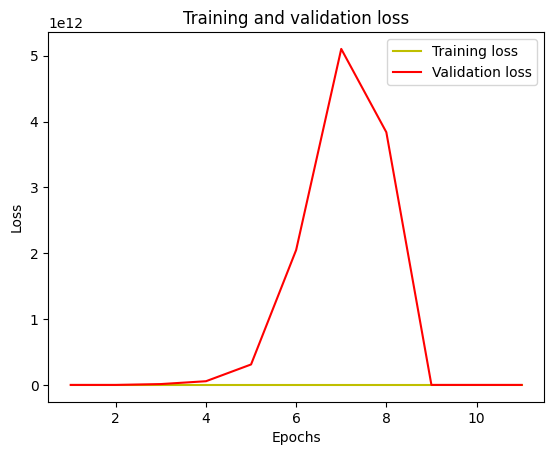

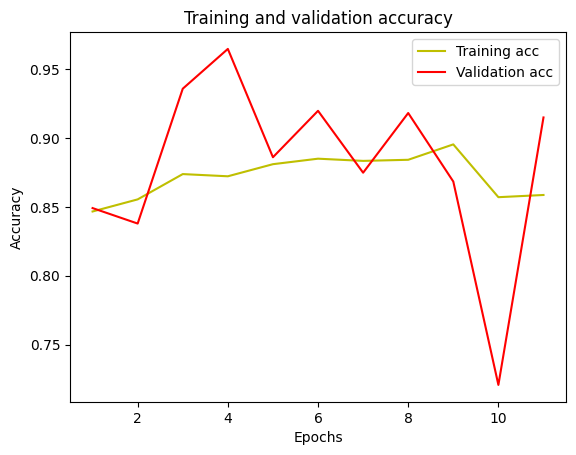

In [94]:
history = history

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Making predictions

In [96]:
test_image = image.load_img('dataset/new_samples/r0_2.jpg', 
                            target_size = (227, 227))

In [97]:
#add channel dimension for image
test_image = image.img_to_array(test_image)

In [98]:
##add batch dimension for image
test_image = np.expand_dims(test_image, axis = 0)

In [99]:
result = model.predict(test_image)

1/1 [==============================] - 0s 128ms/step


In [100]:
if result[0][0] == 0:
    print('apple')
elif result[0][0] == 1:
    print('cabbage')
elif result[0][0] == 2:
    print('carrot')
elif result[0][0] == 3:
    print('cucumber')
elif result[0][0] == 4:
    print('eggplant')
elif result[0][0] == 5:
    print('pear')
elif result[0][0] == 6:
    print('zucchini')

apple


In [101]:
alexnet_model = model
alexnet_model.save("alexnet.h5")


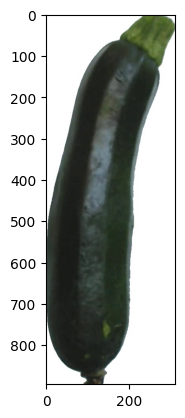

1/1 [==============================] - 0s 66ms/step
eggplant


In [104]:

def load_image_alexnet(filename):
    #load the image
    img = load_img(filename, grayscale=False, target_size=(227, 227))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 227, 227, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

img1 = mpimg.imread('dataset/new_samples/r0_67.jpg')
imgplot = plt.imshow(img1)
plt.show()
img = load_image_alexnet("dataset/new_samples/r0_67.jpg")
alexnet_model = load_model('alexnet.h5')
# predict the class
result = np.argmax(alexnet_model.predict(img))
if result == 0:
    print('apple')
elif result == 1:
    print('cabbage')
elif result == 2:
    print('carrot')
elif result == 3:
    print('cucumber')
elif result == 4:
    print('eggplant')
elif result == 5:
    print('pear')
elif result == 6:
    print('zucchini')
else:
    print("Not in the list")

Conclusion: 
There was a stark difference in the way the two models performed. VGG16 is a complex architechture that has almost three times as many parameters to learn compared to Alexnet. The sheer size of our data set which is small is just not well suited for a complex architecture like VGG16. The dataset is also not balanced as we noticed that there were more pictures of apples and pears in our dataset than we did of other vegetables. Another key difference between the models is that Alexnet uses dropout and batch normalization to take care of overfitting while VGG16 does not. These are the primary reasons why the VGG16 model fails to generalize well on the training data and returns a low accuracy score. 

Alexnet architechture on the other hand is not a complex architecture because Alexnet has fewer parameters than VGG16, it has a lesser capacity to overfit a small dataset. For this reason, it appears that the Alexnet model was better able to learn the parameters and the features in this dataset over VGG16.


Recommendations:
One of the first recommendations include increasing the dataset by adding more images for training especially if we are interested in using VGG16 archtechture because the size of our dataset is simply too small in comarison to the parameters that VGG16 learns.
The dataset consisted of very similar looking images. For this reason any image augmentation done will not help because the dataset is not diverse. For image augmentation to work, the images should be diverse and be somewhat different to each other with a stromg balance of pixel intensities. 
The second recomendation includes transfer learning. This method allows us to freeze the weights of a previously trained model and using them as a starting point to train a model on a second task. This allows us to use these weights which were previously used on larger data sets like imagenet and fine tune smaller datasets like our dataset. Transfer learning has been known to do really well for smaller datasets so it would be an excellent choice for this dataset especially in bringing VGG16 models accuracy up. Since the model was already pre trained in transfer learning, it also converges faster on newer training sets. 

However, for this dataset, if we dont intent on using transfer learning, Alexnet is a better choice as it is a smaller architechture with fewer parameters to learn and also generalizes better because it also uses drop out layers to help with regularization.